In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/tmp/ipykernel_3236554/4079410600.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", len(compression_algorithms))


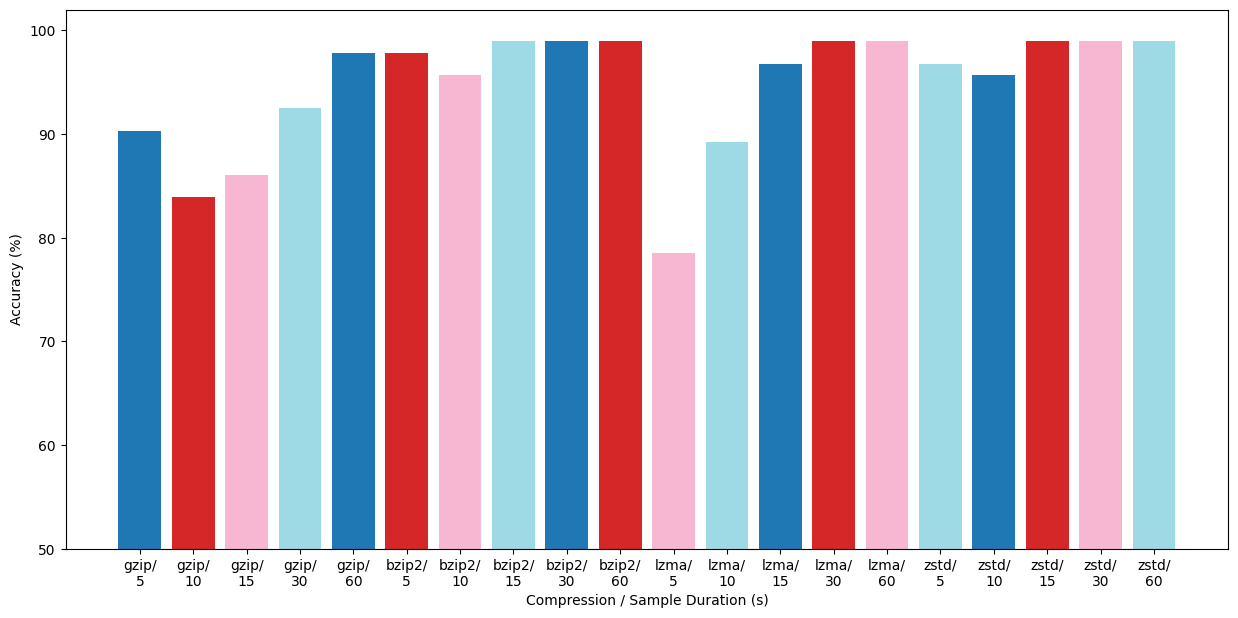

In [2]:
# Load the data

benchmarks = pd.read_csv("data/benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg"]

compression_algorithms = benchmarks["compression"].unique()

raw = benchmarks[benchmarks["effect"] == "raw"]
accuracy_results = {}

for compression in compression_algorithms:
    raw_compression = raw[raw["compression"] == compression]

    actual_row_5 = raw_compression[raw_compression["arg"] == 5][0]
    predicted_row_5 = raw_compression[raw_compression["arg"] == 5][1]
    accuracy_results[(compression, 5)] = accuracy_score(actual_row_5, predicted_row_5)

    actual_row_10 = raw_compression[raw_compression["arg"] == 10][0]
    predicted_row_10 = raw_compression[raw_compression["arg"] == 10][1]
    accuracy_results[(compression, 10)] = accuracy_score(
        actual_row_10, predicted_row_10
    )

    actual_row_15 = raw_compression[raw_compression["arg"] == 15][0]
    predicted_row_15 = raw_compression[raw_compression["arg"] == 15][1]
    accuracy_results[(compression, 15)] = accuracy_score(
        actual_row_15, predicted_row_15
    )

    actual_row_30 = raw_compression[raw_compression["arg"] == 30][0]
    predicted_row_30 = raw_compression[raw_compression["arg"] == 30][1]
    accuracy_results[(compression, 30)] = accuracy_score(
        actual_row_30, predicted_row_30
    )

    actual_row_60 = raw_compression[raw_compression["arg"] == 60][0]
    predicted_row_60 = raw_compression[raw_compression["arg"] == 60][1]
    accuracy_results[(compression, 60)] = accuracy_score(
        actual_row_60, predicted_row_60
    )

# Change palette
colors = plt.cm.get_cmap("tab20", len(compression_algorithms))

# Plot the data in a bar chart
fig, ax = plt.subplots(figsize=(15, 7))
accuracy = []
bar = []
for compression in compression_algorithms:
    accuracy += [
        accuracy_results[(compression, 5)] * 100,
        accuracy_results[(compression, 10)] * 100,
        accuracy_results[(compression, 15)] * 100,
        accuracy_results[(compression, 30)] * 100,
        accuracy_results[(compression, 60)] * 100,
    ]
    bar += [
        compression + "/\n5",
        compression + "/\n10",
        compression + "/\n15",
        compression + "/\n30",
        compression + "/\n60",
    ]

ax.bar(bar, accuracy, label="Accuracy", color=colors.colors)
ax.set_xlabel("Compression / Sample Duration (s)")
ax.set_ylabel("Accuracy (%)")

# Minimum value for y-axis
plt.ylim(50, 102)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'Smells Like Teen Spirit': 135, 'Riptide': 139, 'Thinking out Loud': 144, 'Shine On': 146, 'Cruel Summer': 146, 'Centipede': 134, 'All of Me': 135, 'HUMBLE.': 127, 'Stay With Me': 140, 'Cuidado': 142, 'lovely with Khalid': 129, 'Watermelon Sugar': 148, "God's Plan": 112, 'SICKO MODE': 116, 'One Dance': 138, 'Closer': 137, 'I Wanna Be Yours': 141, 'Demons': 115, 'Ether': 137, 'LOOP feat. Lil Cherry': 141, 'Sweater Weather': 134, 'Happier': 144, 'Take Me To Church': 146, 'Mr. Brightside': 140, 'Stressed Out': 132, 'Man On the Moon': 124, 'Something Just Like This': 126, 'Lele': 148, 'Let Her Go': 133, 'Choke': 141, 'New Rules': 141, 'In the End': 138, 'INDUSTRY BABY feat. Jack Harlow': 117, 'Coconut Water': 145, 'Die For You': 133, 'STAY with Justin Bieber': 148, 'Just the Way You Are': 143, 'Lose Yourself': 109, 'Without Me with Juice WRLD': 138, "There's Nothing Holdin' Me Back": 142, 'Flowers': 144, 'Señorita': 145, 'In the Morning': 148, 'Sparkling Moments': 122, 'Lean On feat. MØ &

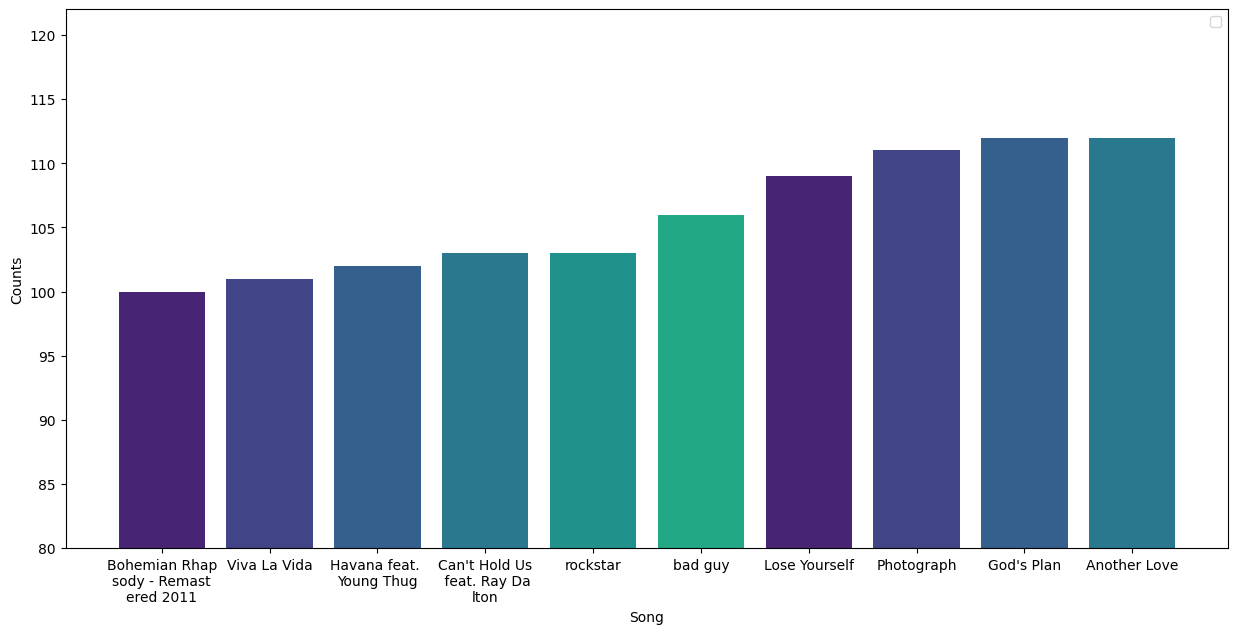

In [3]:
benchmarks = pd.read_csv("data/benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg"]

counts = {}
for i in range(benchmarks.shape[0]):
    if benchmarks[0][i] == benchmarks[1][i]:
        counts[benchmarks[0][i]] = counts.get(benchmarks[0][i], 0) + 1

print(counts)

# Sort the dictionary

sorted_items = sorted(counts.items(), key=lambda item: item[1])

sorted_items = sorted_items[:10]

dict = {}
for item in sorted_items:
    if len(item[0]) > 26:
        # \n \n
        dict[item[0][:13] + "\n" + item[0][13:26] + "\n" + item[0][26:]] = item[1]
    elif len(item[0]) > 13:
        # \n
        dict[item[0][:13] + "\n" + item[0][13:]] = item[1]
    else:
        dict[item[0]] = item[1]

print(dict)

colors = plt.cm.viridis([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# Plot the data in a bar chart
fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(dict.keys(), dict.values(), color=colors)

ax.set_xlabel("Song")

ax.set_ylabel("Counts")

ax.legend()

# Minimum value for y-axis
plt.ylim(80, 122)

plt.show()

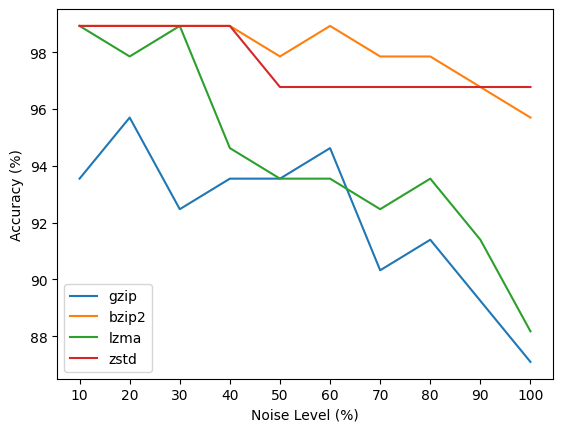

In [4]:
# WHITE NOISE

benchmarks = pd.read_csv("data/benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg"]

compression_algorithms = benchmarks["compression"].unique()

white_noise = benchmarks[benchmarks["effect"] == "whitenoise"]

accuracy_results = {}

for compression in compression_algorithms:

    white_noise_compression = white_noise[white_noise["compression"] == compression]

    for i in range(10):
        actual_row = white_noise_compression[
            white_noise_compression["arg"] == ((i + 1) * 10)
        ][0]
        predicted_row = white_noise_compression[
            white_noise_compression["arg"] == ((i + 1) * 10)
        ][1]
        accuracy_results[(compression, (i + 1) * 10)] = accuracy_score(
            actual_row, predicted_row
        )

# Plot the data in a line chart

fig, ax = plt.subplots()

for compression in compression_algorithms:
    accuracy = []
    for i in range(10):
        accuracy.append(accuracy_results[(compression, (i + 1) * 10)] * 100)
    ax.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], accuracy, label=compression)

ax.set_xlabel("Noise Level (%)")
ax.set_ylabel("Accuracy (%)")
ax.legend()

# x label ticks
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

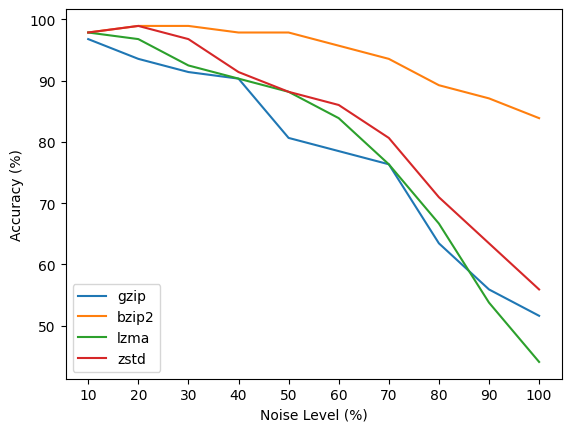

In [5]:
# PINK NOISE

benchmarks = pd.read_csv("data/benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg"]

compression_algorithms = benchmarks["compression"].unique()

pink_noise = benchmarks[benchmarks["effect"] == "pinknoise"]

accuracy_results = {}

for compression in compression_algorithms:

    pink_noise_compression = pink_noise[pink_noise["compression"] == compression]

    for i in range(10):
        actual_row = pink_noise_compression[
            pink_noise_compression["arg"] == ((i + 1) * 10)
        ][0]
        predicted_row = pink_noise_compression[
            pink_noise_compression["arg"] == ((i + 1) * 10)
        ][1]
        accuracy_results[(compression, (i + 1) * 10)] = accuracy_score(
            actual_row, predicted_row
        )

# Plot the data in a line chart

fig, ax = plt.subplots()

for compression in compression_algorithms:
    accuracy = []
    for i in range(10):
        accuracy.append(accuracy_results[(compression, (i + 1) * 10)] * 100)
    ax.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], accuracy, label=compression)

ax.set_xlabel("Noise Level (%)")
ax.set_ylabel("Accuracy (%)")
ax.legend()

# x label ticks
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

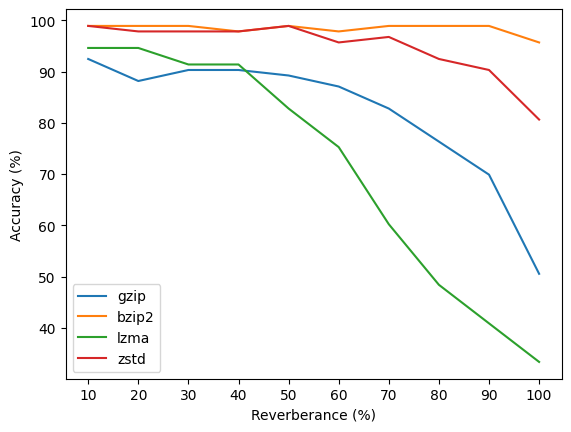

In [6]:
# REVERB

benchmarks = pd.read_csv("data/benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg"]

compression_algorithms = benchmarks["compression"].unique()

reverb = benchmarks[benchmarks["effect"] == "reverb"]

accuracy_results = {}

for compression in compression_algorithms:

    reverb_compression = reverb[reverb["compression"] == compression]

    for i in range(10):
        actual_row = reverb_compression[reverb_compression["arg"] == ((i + 1) * 10)][0]
        predicted_row = reverb_compression[reverb_compression["arg"] == ((i + 1) * 10)][
            1
        ]
        accuracy_results[(compression, (i + 1) * 10)] = accuracy_score(
            actual_row, predicted_row
        )

# Plot the data in a line chart

fig, ax = plt.subplots()

for compression in compression_algorithms:
    accuracy = []
    for i in range(10):
        accuracy.append(accuracy_results[(compression, (i + 1) * 10)] * 100)
    ax.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], accuracy, label=compression)

ax.set_xlabel("Reverberance (%)")
ax.set_ylabel("Accuracy (%)")
ax.legend()

# x label ticks
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

In [20]:
def precision_at_k(ground_truth, predicted):
    assert len(ground_truth) == len(
        predicted
    ), f"Lengths ({len(ground_truth)}, {len(predicted)}) do not match."

    ground_truth = set(ground_truth)
    predicted = set(predicted)

    if len(predicted) > 0:
        return len(ground_truth.intersection(predicted)) / len(predicted)

    return 0


def recall_at_k(ground_truth, predicted):
    assert len(ground_truth) == len(
        predicted
    ), f"Lengths ({len(ground_truth)}, {len(predicted)}) do not match."

    ground_truth = set(ground_truth)
    predicted = set(predicted)

    if len(ground_truth) > 0:
        return len(ground_truth.intersection(predicted)) / len(ground_truth)

    return 0


def ap_k(ground_truth, predicted):
    assert len(ground_truth) == len(
        predicted
    ), f"Lengths ({len(ground_truth)}, {len(predicted)}) do not match."
    if len(predicted) > 0:
        # use precision@k to get the precision at each rank
        avg_precision = 0

        for i, p in enumerate(predicted):
            if p in ground_truth:
                avg_precision += precision_at_k(
                    ground_truth[: i + 1], predicted[: i + 1]
                )

        return avg_precision / len(ground_truth)

    return 0

In [30]:
# Table

benchmarks = pd.read_csv("data/benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg"]

compression_algorithms = benchmarks["compression"].unique()

raw = benchmarks[benchmarks["effect"] == "raw"]
accuracy_results_raw = {}

for compression in compression_algorithms:
    raw_compression = raw[raw["compression"] == compression]

    actual_row_5 = raw_compression[raw_compression["arg"] == 5][0]
    predicted_row_5 = raw_compression[raw_compression["arg"] == 5][1]
    accuracy_results_raw[(compression, 5)] = accuracy_score(
        actual_row_5, predicted_row_5
    )

    actual_row_10 = raw_compression[raw_compression["arg"] == 10][0]
    predicted_row_10 = raw_compression[raw_compression["arg"] == 10][1]
    accuracy_results_raw[(compression, 10)] = accuracy_score(
        actual_row_10, predicted_row_10
    )

    actual_row_15 = raw_compression[raw_compression["arg"] == 15][0]
    predicted_row_15 = raw_compression[raw_compression["arg"] == 15][1]
    accuracy_results_raw[(compression, 15)] = accuracy_score(
        actual_row_15, predicted_row_15
    )

    actual_row_30 = raw_compression[raw_compression["arg"] == 30][0]
    predicted_row_30 = raw_compression[raw_compression["arg"] == 30][1]
    # get columns 1:11
    ground_truth = raw_compression[raw_compression["arg"] == 30].iloc[:, 1:11]
    accuracy_results_raw[(compression, 30)] = accuracy_score(
        actual_row_30, predicted_row_30
    )

    actual_row_60 = raw_compression[raw_compression["arg"] == 60][0]
    predicted_row_60 = raw_compression[raw_compression["arg"] == 60][1]
    accuracy_results_raw[(compression, 60)] = accuracy_score(
        actual_row_60, predicted_row_60
    )

white_noise = benchmarks[benchmarks["effect"] == "whitenoise"]
accuracy_results_white_noise = {}
precision_results_white_noise = {}
recall_results_white_noise = {}
map_results_white_noise = {}

for compression in compression_algorithms:

    white_noise_compression = white_noise[white_noise["compression"] == compression]

    for i in range(10):
        actual_row = white_noise_compression[
            white_noise_compression["arg"] == ((i + 1) * 10)
        ][0]
        predicted_row = white_noise_compression[
            white_noise_compression["arg"] == ((i + 1) * 10)
        ][1]
        accuracy_results_white_noise[(compression, (i + 1) * 10)] = accuracy_score(
            actual_row, predicted_row
        )

        mean_precision = 0
        mean_recall = 0
        mean_ap = 0

        # iterate over predicted_row and compare with ground truth
        ctr = 0
        for _, row in white_noise_compression[
            white_noise_compression["arg"] == ((i + 1) * 10)
        ].iterrows():
            predicted_top_k = row[1:11].values.tolist()

            mean_precision += precision_at_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )

            mean_recall += recall_at_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )
            mean_ap += ap_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )

            ctr += 1

        precision_results_white_noise[(compression, (i + 1) * 10)] = (
            mean_precision / ctr
        )
        recall_results_white_noise[(compression, (i + 1) * 10)] = mean_recall / ctr
        map_results_white_noise[(compression, (i + 1) * 10)] = mean_ap / ctr


pink_noise = benchmarks[benchmarks["effect"] == "pinknoise"]
accuracy_results_pink_noise = {}
precision_results_pink_noise = {}
recall_results_pink_noise = {}
map_results_pink_noise = {}

for compression in compression_algorithms:

    pink_noise_compression = pink_noise[pink_noise["compression"] == compression]

    for i in range(10):
        actual_row = pink_noise_compression[
            pink_noise_compression["arg"] == ((i + 1) * 10)
        ][0]
        predicted_row = pink_noise_compression[
            pink_noise_compression["arg"] == ((i + 1) * 10)
        ][1]
        accuracy_results_pink_noise[(compression, (i + 1) * 10)] = accuracy_score(
            actual_row, predicted_row
        )

        mean_precision = 0
        mean_recall = 0
        mean_ap = 0

        # iterate over predicted_row and compare with ground truth
        ctr = 0
        for _, row in pink_noise_compression[
            pink_noise_compression["arg"] == ((i + 1) * 10)
        ].iterrows():
            predicted_top_k = row[1:11].values.tolist()

            mean_precision += precision_at_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )

            mean_recall += recall_at_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )
            mean_ap += ap_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )

            ctr += 1

        precision_results_pink_noise[(compression, (i + 1) * 10)] = mean_precision / ctr
        recall_results_pink_noise[(compression, (i + 1) * 10)] = mean_recall / ctr
        map_results_pink_noise[(compression, (i + 1) * 10)] = mean_ap / ctr


reverb = benchmarks[benchmarks["effect"] == "reverb"]
accuracy_results_reverb = {}
precision_at_k_reverb = {}
recall_at_k_reverb = {}
map_at_k_reverb = {}

for compression in compression_algorithms:

    reverb_compression = reverb[reverb["compression"] == compression]

    for i in range(10):
        actual_row = reverb_compression[reverb_compression["arg"] == ((i + 1) * 10)][0]
        predicted_row = reverb_compression[reverb_compression["arg"] == ((i + 1) * 10)][
            1
        ]
        accuracy_results_reverb[(compression, (i + 1) * 10)] = accuracy_score(
            actual_row, predicted_row
        )

        mean_precision = 0
        mean_recall = 0
        mean_ap = 0

        # iterate over predicted_row and compare with ground truth
        ctr = 0
        for _, row in reverb_compression[
            reverb_compression["arg"] == ((i + 1) * 10)
        ].iterrows():
            predicted_top_k = row[1:11].values.tolist()

            mean_precision += precision_at_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )

            mean_recall += recall_at_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )
            mean_ap += ap_k(
                ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
            )

            ctr += 1

        precision_at_k_reverb[(compression, (i + 1) * 10)] = mean_precision / ctr
        recall_at_k_reverb[(compression, (i + 1) * 10)] = mean_recall / ctr
        map_at_k_reverb[(compression, (i + 1) * 10)] = mean_ap / ctr


reverse = benchmarks[benchmarks["effect"] == "reverse"]
accuracy_results_reverse = {}
precision_at_k_reverse = {}
recall_at_k_reverse = {}
map_at_k_reverse = {}

for compression in compression_algorithms:

    reverse_compression = reverse[reverse["compression"] == compression]

    actual_row = reverse_compression[0]
    predicted_row = reverse_compression[1]
    accuracy_results_reverse[(compression, 1)] = accuracy_score(
        actual_row, predicted_row
    )

    mean_precision = 0
    mean_recall = 0
    mean_ap = 0

    # iterate over predicted_row and compare with ground truth
    ctr = 0
    for _, row in reverse_compression.iterrows():
        predicted_top_k = row[1:11].values.tolist()

        mean_precision += precision_at_k(
            ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
        )

        mean_recall += recall_at_k(
            ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
        )

        ctr += 1

    precision_at_k_reverse[(compression, 1)] = mean_precision / ctr
    recall_at_k_reverse[(compression, 1)] = mean_recall / ctr
    map_at_k_reverse[(compression, 1)] = mean_ap / ctr

ambience = benchmarks[benchmarks["effect"] == "ambience"]
accuracy_results_ambience = {}
precision_at_k_ambience = {}
recall_at_k_ambience = {}
map_at_k_ambience = {}

for compression in compression_algorithms:

    ambience_compression = ambience[ambience["compression"] == compression]

    actual_row = ambience_compression[0]
    predicted_row = ambience_compression[1]
    accuracy_results_ambience[(compression, 1)] = accuracy_score(
        actual_row, predicted_row
    )

    mean_precision = 0
    mean_recall = 0
    mean_ap = 0

    # iterate over predicted_row and compare with ground truth
    ctr = 0
    for _, row in ambience_compression.iterrows():
        predicted_top_k = row[1:11].values.tolist()

        mean_precision += precision_at_k(
            ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
        )

        mean_recall += recall_at_k(
            ground_truth.iloc[ctr].values.tolist(), list(predicted_top_k)
        )

        ctr += 1

    precision_at_k_ambience[(compression, 1)] = mean_precision / ctr
    recall_at_k_ambience[(compression, 1)] = mean_recall / ctr
    map_at_k_ambience[(compression, 1)] = mean_ap / ctr


# dict with this format: (gzip, raw, 5) and (gzip, reverse, 1) for key
# and accuracy for value

accuracy_results = {}
precision_at_k_results = {}
recall_at_k_results = {}
map_at_k_results = {}

for key in accuracy_results_raw.keys():
    accuracy_results[(key[0], "raw", key[1])] = accuracy_results_raw[key]

for key in accuracy_results_white_noise.keys():
    accuracy_results[(key[0], "white noise", key[1])] = accuracy_results_white_noise[
        key
    ]
    precision_at_k_results[(key[0], "white noise", key[1])] = (
        precision_results_white_noise[key]
    )
    recall_at_k_results[(key[0], "white noise", key[1])] = recall_results_white_noise[
        key
    ]
    map_at_k_results[(key[0], "white noise", key[1])] = map_results_white_noise[key]

for key in accuracy_results_pink_noise.keys():
    accuracy_results[(key[0], "pink noise", key[1])] = accuracy_results_pink_noise[key]
    precision_at_k_results[(key[0], "pink noise", key[1])] = (
        precision_results_pink_noise[key]
    )
    recall_at_k_results[(key[0], "pink noise", key[1])] = recall_results_pink_noise[key]
    map_at_k_results[(key[0], "pink noise", key[1])] = map_results_pink_noise[key]

for key in accuracy_results_reverb.keys():
    accuracy_results[(key[0], "reverb", key[1])] = accuracy_results_reverb[key]
    precision_at_k_results[(key[0], "reverb", key[1])] = precision_at_k_reverb[key]
    recall_at_k_results[(key[0], "reverb", key[1])] = recall_at_k_reverb[key]
    map_at_k_results[(key[0], "reverb", key[1])] = map_at_k_reverb[key]

for key in accuracy_results_reverse.keys():
    accuracy_results[(key[0], "reverse", 1)] = accuracy_results_reverse[key]
    precision_at_k_results[(key[0], "reverse", 1)] = precision_at_k_reverse[key]
    recall_at_k_results[(key[0], "reverse", 1)] = recall_at_k_reverse[key]
    map_at_k_results[(key[0], "reverse", 1)] = map_at_k_reverse[key]

for key in accuracy_results_ambience.keys():
    accuracy_results[(key[0], "ambience", 1)] = accuracy_results_ambience[key]
    precision_at_k_results[(key[0], "ambience", 1)] = precision_at_k_ambience[key]
    recall_at_k_results[(key[0], "ambience", 1)] = recall_at_k_ambience[key]
    map_at_k_results[(key[0], "ambience", 1)] = map_at_k_ambience[key]

print(accuracy_results)
print(precision_at_k_results)
print(recall_at_k_results)
print(map_at_k_results)

{('gzip', 'raw', 5): 0.9032258064516129, ('gzip', 'raw', 10): 0.8387096774193549, ('gzip', 'raw', 15): 0.8602150537634409, ('gzip', 'raw', 30): 0.9247311827956989, ('gzip', 'raw', 60): 0.978494623655914, ('bzip2', 'raw', 5): 0.978494623655914, ('bzip2', 'raw', 10): 0.956989247311828, ('bzip2', 'raw', 15): 0.989247311827957, ('bzip2', 'raw', 30): 0.989247311827957, ('bzip2', 'raw', 60): 0.989247311827957, ('lzma', 'raw', 5): 0.7849462365591398, ('lzma', 'raw', 10): 0.8924731182795699, ('lzma', 'raw', 15): 0.967741935483871, ('lzma', 'raw', 30): 0.989247311827957, ('lzma', 'raw', 60): 0.989247311827957, ('zstd', 'raw', 5): 0.967741935483871, ('zstd', 'raw', 10): 0.956989247311828, ('zstd', 'raw', 15): 0.989247311827957, ('zstd', 'raw', 30): 0.989247311827957, ('zstd', 'raw', 60): 0.989247311827957, ('gzip', 'white noise', 10): 0.9354838709677419, ('gzip', 'white noise', 20): 0.956989247311828, ('gzip', 'white noise', 30): 0.9247311827956989, ('gzip', 'white noise', 40): 0.935483870967741

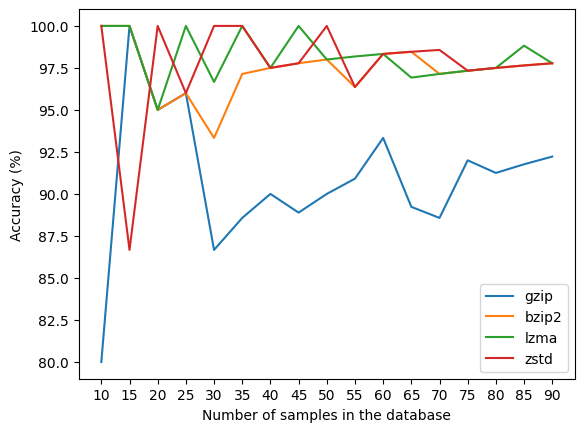

In [21]:
benchmarks = pd.read_csv("data/db_size_benchmark.csv", header=None)
benchmarks[0] = benchmarks[0].str.replace(
    "Do I Wanna Know", "Do I Wanna Know?"
)  # fix the song name
benchmarks[0] = benchmarks[0].str.replace(
    "Mr. Brightside. Brightside", "Mr. Brightside"
)  # fix the song name
benchmarks.columns = list(range(11)) + ["compression", "effect", "arg", "dbsize"]

compression_algorithms = benchmarks["compression"].unique()

# pink_noise = benchmarks[benchmarks["effect"] == "pinknoise"]
#
# accuracy_results = {}
#
# for compression in compression_algorithms:
#
#    pink_noise_compression = pink_noise[pink_noise["compression"] == compression]
#
#    for i in range(10):
#        actual_row = pink_noise_compression[
#            pink_noise_compression["arg"] == ((i + 1) * 10)
#        ][0]
#        predicted_row = pink_noise_compression[
#            pink_noise_compression["arg"] == ((i + 1) * 10)
#        ][1]
#        accuracy_results[(compression, (i + 1) * 10)] = accuracy_score(
#            actual_row, predicted_row
#        )
#
## Plot the data in a line chart
#
# fig, ax = plt.subplots()
#
# for compression in compression_algorithms:
#    accuracy = []
#    for i in range(10):
#        accuracy.append(accuracy_results[(compression, (i + 1) * 10)] * 100)
#    ax.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], accuracy, label=compression)
#
# ax.set_xlabel("Noise Level (%)")
# ax.set_ylabel("Accuracy (%)")
# ax.legend()
#
## x label ticks
# plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#
# plt.show()

raw = benchmarks[benchmarks["effect"] == "raw"]

accuracy_results = {}

for compression in compression_algorithms:

    raw_compression = raw[raw["compression"] == compression]

    for i in [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]:
        actual_row = raw_compression[raw_compression["dbsize"] == i][0]
        predicted_row = raw_compression[raw_compression["dbsize"] == i][1]
        accuracy_results[(compression, i)] = accuracy_score(actual_row, predicted_row)

# Plot the data in a line chart

fig, ax = plt.subplots()

for compression in compression_algorithms:
    accuracy = []
    for i in [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]:
        accuracy.append(accuracy_results[(compression, i)] * 100)
    ax.plot(
        [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
        accuracy,
        label=compression,
    )

ax.set_xlabel("Number of samples in the database")

ax.set_ylabel("Accuracy (%)")

ax.legend()

# x label ticks

plt.xticks([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

plt.show()